In [1]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
df = pd.read_csv("Movie_regression.csv", header = 0)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [3]:
df.describe() #get descriptive statistics

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

#### Observations from initial inspection

* Missing values in "time_taken" variable
* Outliers in "Marketing_expense" and "Twitter_hashtags"? ->inspect visually
* categorical variables "3d_available", "Genre"

<AxesSubplot:ylabel='Marketing expense'>

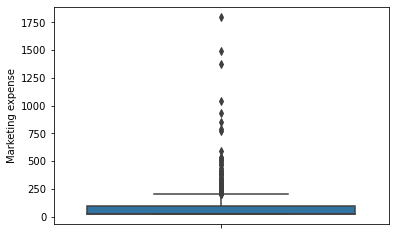

In [5]:
sns.boxplot(y = "Marketing expense", data = df)

<AxesSubplot:ylabel='Twitter_hastags'>

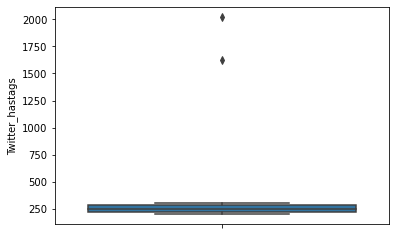

In [6]:
sns.boxplot(y = "Twitter_hastags", data = df)

* By inspecting boxplots we confirm that there are outliers in these variables

### Missing value imputation

In [7]:
#mean value of Time_taken variable
df.Time_taken.mean()

157.39149797570855

In [8]:
#fill nas with mean values
df.Time_taken = df.Time_taken.fillna(np.mean(df.Time_taken))
#or
#df["Time_taken"].fillna(value = df.Time_taken.mean(), inplace = True) #inplace argument specifies the replacement of the dataframe with the value specified.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Dummy variable creation

In [10]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [11]:
#transform categorial vars to dummies (0s and 1s)
df = pd.get_dummies(df, columns = ["3D_available", "Genre"], drop_first = True) #the number of dummies are n-1 variables so we specify the drop_first argument equals True

### Split the data into predictors (X - independent) and response (y - dependent) variables

In [12]:
X = df.loc[:,df.columns != "Collection"] #all variables except collections to be store in X predictors
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [13]:
X.shape

(506, 19)

In [14]:
y = df["Collection"]
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [15]:
y.shape

(506,)

### Train-test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 19) (102, 19) (404,) (102,)


### Training Regression Tree

In [18]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3) #assign object classifier of the model and specify hyperparameters of the model

#other arguments to control tree growth:
#min_samples_split -> min observations at internal node
#min_samples_leaf -> min observations at leaf node
#ccp_alpha -> complexity parameter

In [19]:
regtree.fit(X_train, y_train) #fit the tree model

DecisionTreeRegressor(max_depth=3)

In [20]:
y_pred_train = regtree.predict(X_train) #get the predictions for train set of predictors
y_pred_test = regtree.predict(X_test) #get the predictions for test set of predictors

In [21]:
#get metrics of evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"mse_train: {mse_train}", f"r2_train: {r2_test}", f"mse_test: {mse_test}", f"r2_test: {r2_test}")

mse_train: 55636391.90989135 r2_train: 0.6540678457568934 mse_test: 111364081.74002264 r2_test: 0.6540678457568934


MSE = mean deviation of predicted values from actual observations. It is absolute values and you cannot compare across diff. datasets, but you can compare MSE of different models on the same dataset.

R2 = varies from 0 to 1, close to 1 means total variance explained of y-response variable from X-predictors, and 0 the opposite. Generally it lies btw 0.4 and 0.8 for good models, and above 0.8 for excellent models

### Plotting the decision tree

In [37]:
#plot text representation of tree
text_representation = tree.export_text(regtree)
print(text_representation)

|--- feature_3 <= 37982.31
|   |--- feature_10 <= 440172.50
|   |   |--- feature_0 <= 135.64
|   |   |   |--- value: [35137.78]
|   |   |--- feature_0 >  135.64
|   |   |   |--- value: [23514.29]
|   |--- feature_10 >  440172.50
|   |   |--- feature_6 <= 9.32
|   |   |   |--- value: [46187.36]
|   |   |--- feature_6 >  9.32
|   |   |   |--- value: [100000.00]
|--- feature_3 >  37982.31
|   |--- feature_3 <= 41312.54
|   |   |--- feature_2 <= 0.34
|   |   |   |--- value: [28800.00]
|   |   |--- feature_2 >  0.34
|   |   |   |--- value: [65183.33]
|   |--- feature_3 >  41312.54
|   |   |--- feature_10 <= 494239.00
|   |   |   |--- value: [43800.00]
|   |   |--- feature_10 >  494239.00
|   |   |   |--- value: [91860.87]



[Text(1395.0, 1426.95, 'Budget <= 37982.312\nmse = 340211131.017\nsamples = 404\nvalue = 45178.713'),
 Text(697.5, 1019.25, 'Trailer_views <= 440172.5\nmse = 150397028.852\nsamples = 329\nvalue = 39150.152'),
 Text(348.75, 611.55, 'Marketing expense <= 135.638\nmse = 77238706.48\nsamples = 153\nvalue = 30351.634'),
 Text(174.375, 203.8499999999999, 'mse = 46827239.506\nsamples = 90\nvalue = 35137.778'),
 Text(523.125, 203.8499999999999, 'mse = 41209795.918\nsamples = 63\nvalue = 23514.286'),
 Text(1046.25, 611.55, 'Lead_Actress_rating <= 9.315\nmse = 88194771.436\nsamples = 176\nvalue = 46798.864'),
 Text(871.875, 203.8499999999999, 'mse = 56301679.218\nsamples = 174\nvalue = 46187.356'),
 Text(1220.625, 203.8499999999999, 'mse = 0.0\nsamples = 2\nvalue = 100000.0'),
 Text(2092.5, 1019.25, 'Budget <= 41312.535\nmse = 314082090.667\nsamples = 75\nvalue = 71624.0'),
 Text(1743.75, 611.55, 'Multiplex coverage <= 0.341\nmse = 153862452.903\nsamples = 51\nvalue = 63043.137'),
 Text(1569.375

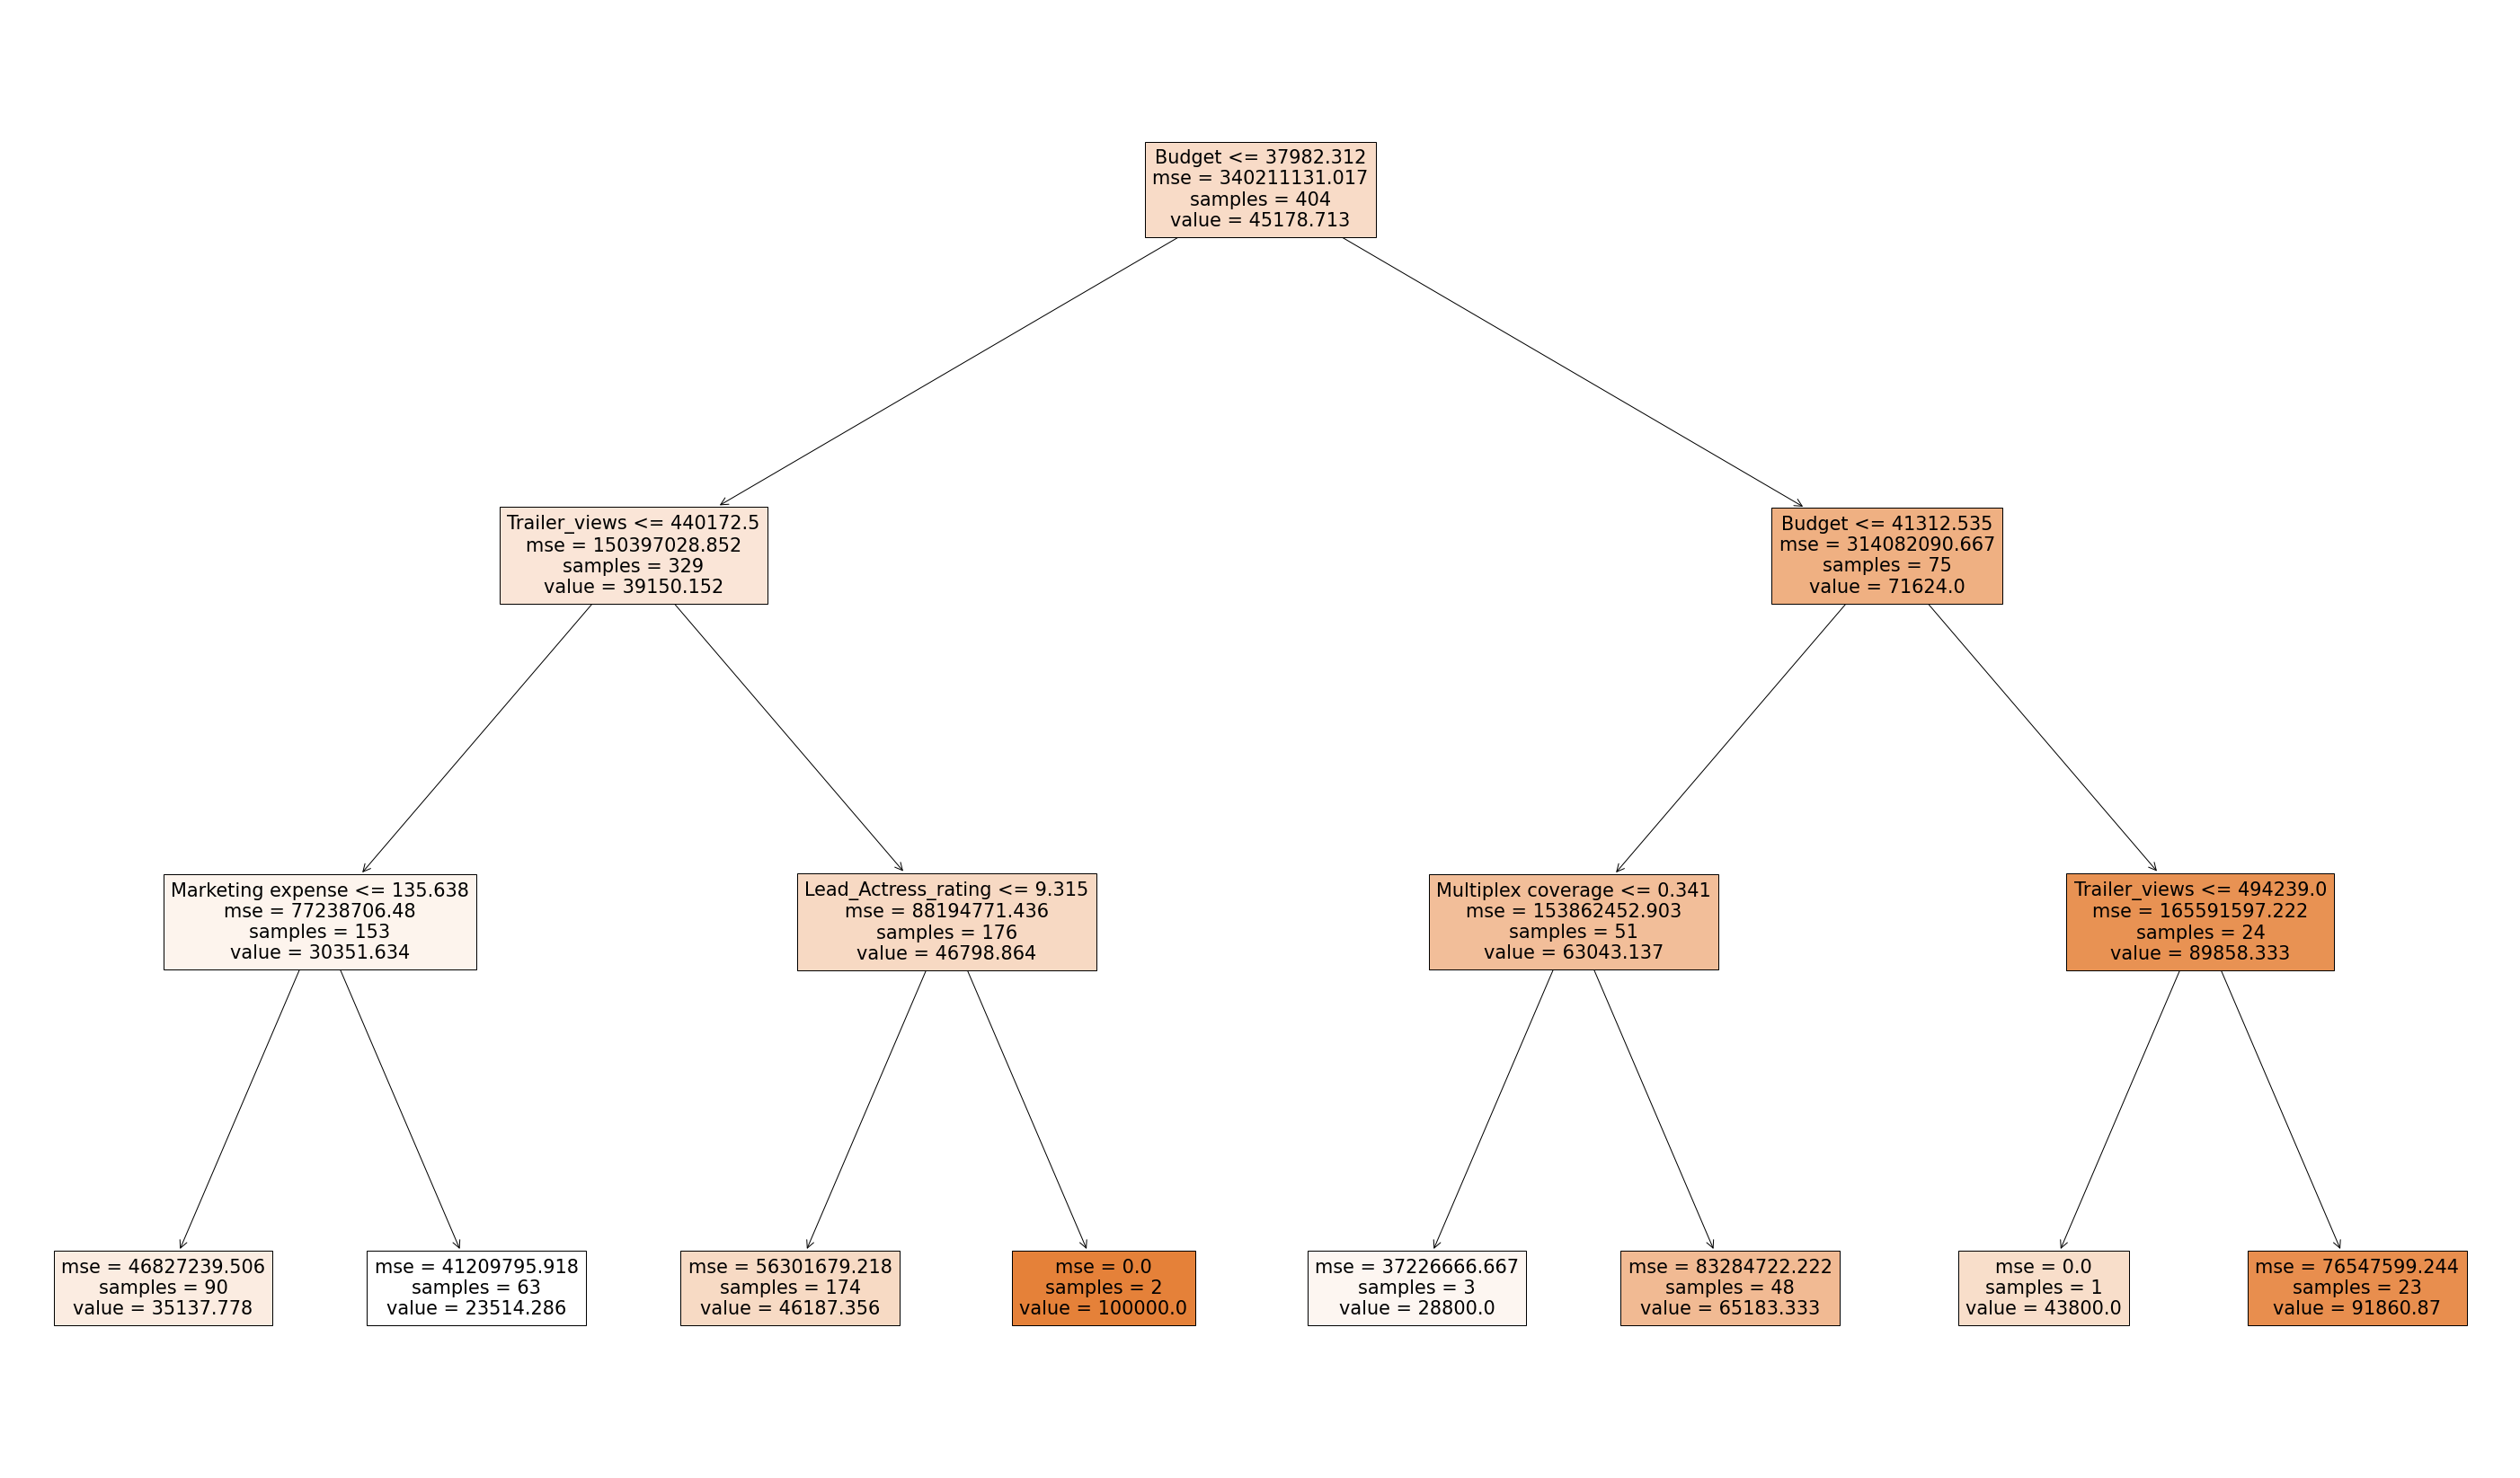

In [54]:
fig = plt.figure(figsize=(50,30))
tree.plot_tree(regtree, 
               feature_names = X_train.columns,
               class_names= y_train.name,
               filled=True)

### Pruning a tree

**Use of cost complexity parameter tuning**

This parameter stop trees from growing until each individual point of the set is trained because each point will be used to be trained itself resulting in overfitting. 


The complexity parameter is a term added to the RSS function of the tree, because for each split the RSS will continue to decrease until it reaches 0 and will cause the problem noted above. Larger numbers of the complexity parameter will make the tree to stop growing earlier. 


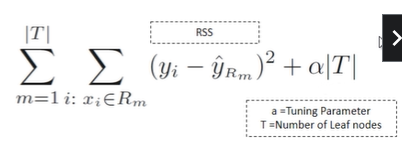


The alfa parameter above is the cost complexity parameter. As it is a tuning hyperparameter, we have to iterate the algorithm on the train set until we find the optimal number for the complexity parameter that minimizes the RSS or MSE or RMSE, so we will get better performance on the test set. 


The pruning is to tree suboptimal parts of the tree that are note informative/beneficial to the overall decision tree.  


**In python we can only do pre-pruning and not pos-pruning**

#### Minimum observations at internal node

In [57]:
#create regression tree object specifying argument min_samples_split = 40
regtree1 = tree.DecisionTreeRegressor(min_samples_split = 40) #for every splitting, minimum 40 samples are required
regtree1.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=40)

[Text(941.625, 1032.8400000000001, 'Budget <= 37982.312\nmse = 340211131.017\nsamples = 404\nvalue = 45178.713'),
 Text(627.75, 924.1200000000001, 'Trailer_views <= 440172.5\nmse = 150397028.852\nsamples = 329\nvalue = 39150.152'),
 Text(348.75, 815.4000000000001, 'Marketing expense <= 135.638\nmse = 77238706.48\nsamples = 153\nvalue = 30351.634'),
 Text(139.5, 706.6800000000001, 'Movie_length <= 155.0\nmse = 46827239.506\nsamples = 90\nvalue = 35137.778'),
 Text(69.75, 597.96, 'mse = 14200332.41\nsamples = 19\nvalue = 42357.895'),
 Text(209.25, 597.96, 'Trailer_views <= 387659.5\nmse = 37874897.838\nsamples = 71\nvalue = 33205.634'),
 Text(139.5, 489.24, 'mse = 36914720.571\nsamples = 29\nvalue = 29910.345'),
 Text(279.0, 489.24, 'Marketing expense <= 22.954\nmse = 25862970.522\nsamples = 42\nvalue = 35480.952'),
 Text(209.25, 380.5200000000001, 'mse = 7742222.222\nsamples = 9\nvalue = 41000.0'),
 Text(348.75, 380.5200000000001, 'mse = 20232139.578\nsamples = 33\nvalue = 33975.758'),


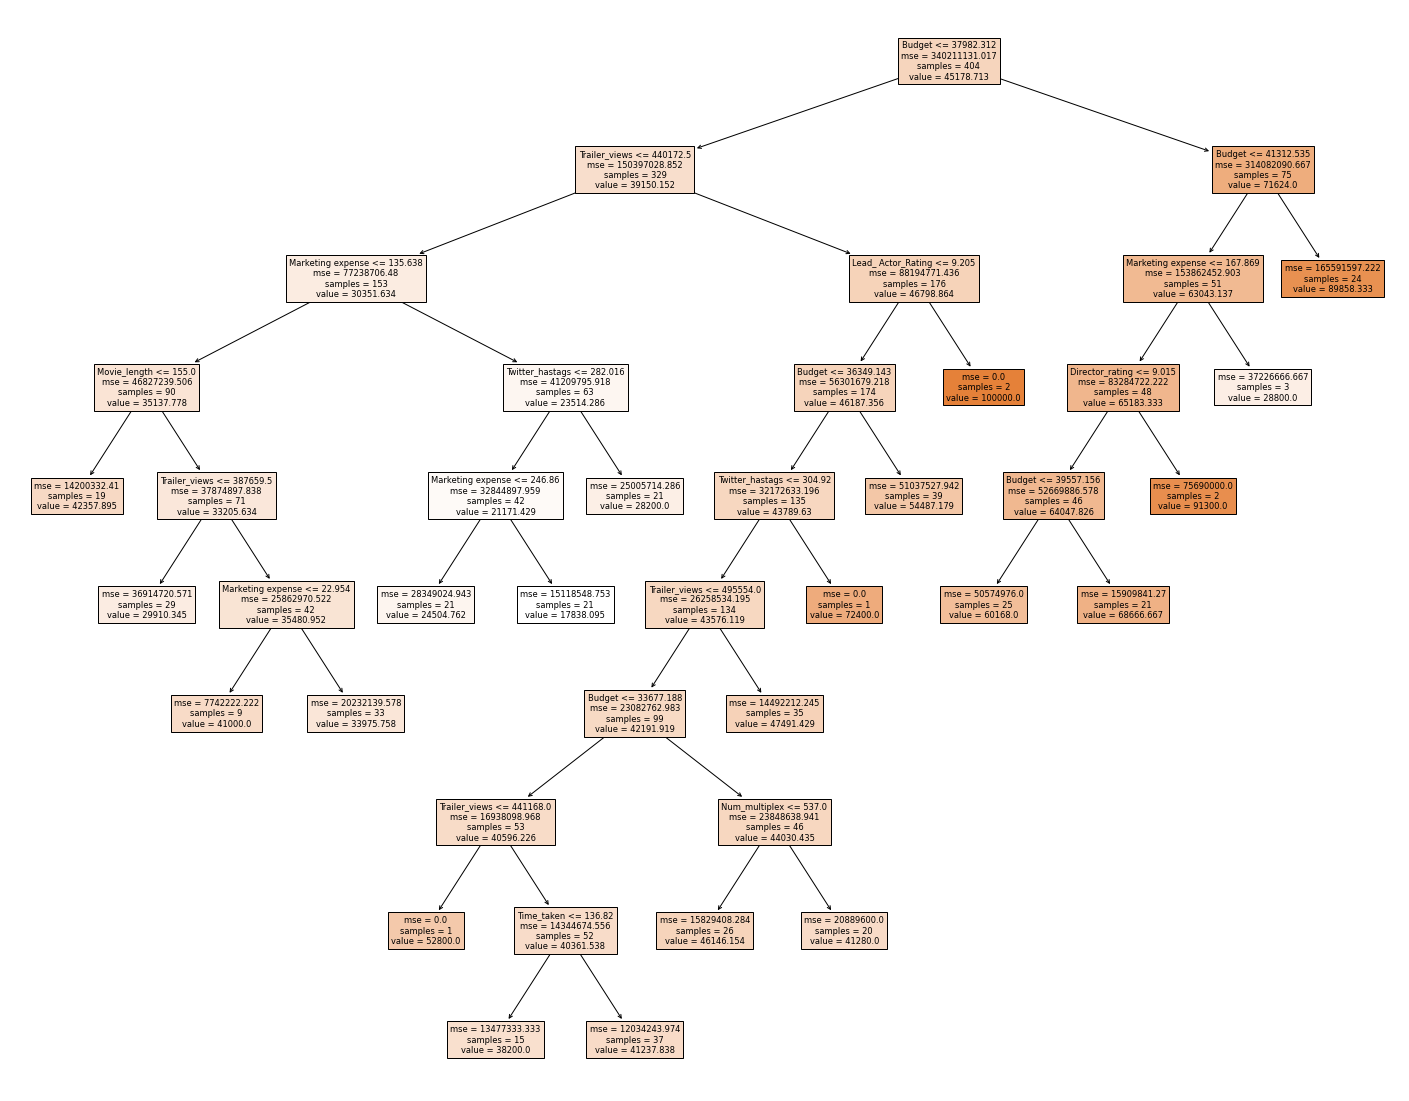

In [59]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(regtree1, 
               feature_names = X_train.columns,
               class_names= y_train.name,
               filled=True)

#### Minimum observations at leaf node

In [60]:
#specify the number of minimum observations needed at te terminal nodes to prune it (you can see above that there are terminals with sample = 1)
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf=25)
regtree3.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=25)

[Text(910.625, 1009.5428571428572, 'Budget <= 37982.312\nmse = 340211131.017\nsamples = 404\nvalue = 45178.713'),
 Text(581.25, 854.2285714285715, 'Trailer_views <= 440172.5\nmse = 150397028.852\nsamples = 329\nvalue = 39150.152'),
 Text(310.0, 698.9142857142858, 'Marketing expense <= 135.638\nmse = 77238706.48\nsamples = 153\nvalue = 30351.634'),
 Text(155.0, 543.6, 'Movie_length <= 158.6\nmse = 46827239.506\nsamples = 90\nvalue = 35137.778'),
 Text(77.5, 388.28571428571433, 'mse = 23726336.0\nsamples = 25\nvalue = 40792.0'),
 Text(232.5, 388.28571428571433, 'Trailer_views <= 387880.5\nmse = 38686636.686\nsamples = 65\nvalue = 32963.077'),
 Text(155.0, 232.97142857142865, 'mse = 37777295.918\nsamples = 28\nvalue = 30035.714'),
 Text(310.0, 232.97142857142865, 'mse = 27982235.208\nsamples = 37\nvalue = 35178.378'),
 Text(465.0, 543.6, 'Trailer_views <= 362330.5\nmse = 41209795.918\nsamples = 63\nvalue = 23514.286'),
 Text(387.5, 388.28571428571433, 'mse = 36159853.076\nsamples = 33\nva

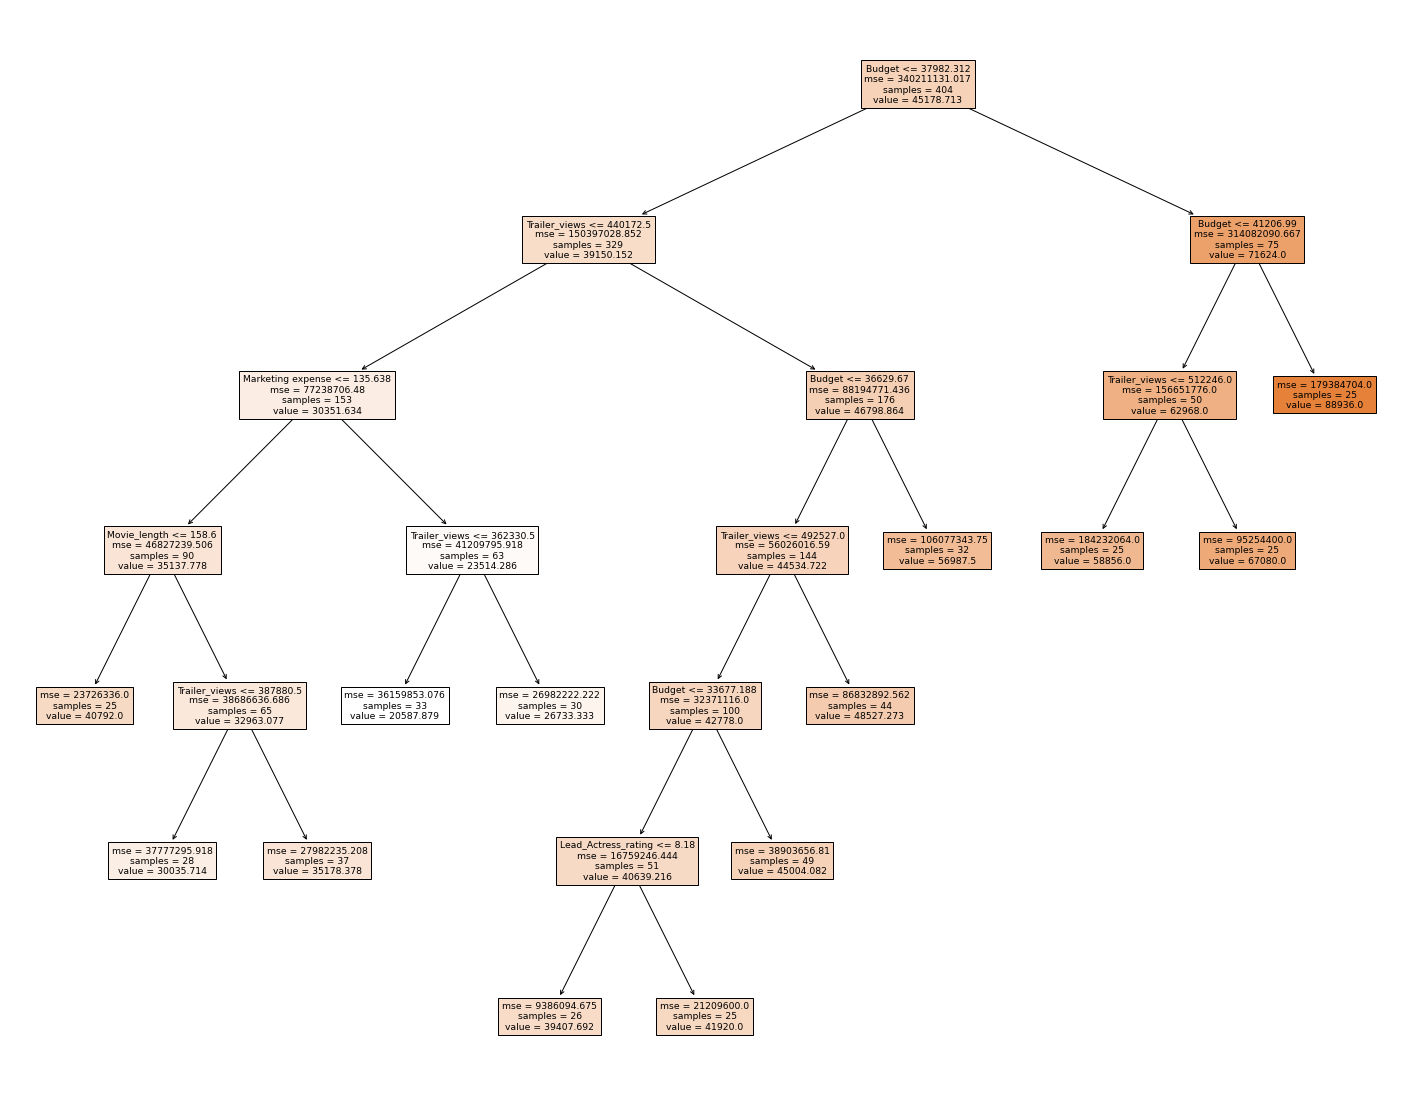

In [61]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(regtree3, 
               feature_names = X_train.columns,
               class_names= y_train.name,
               filled=True)

#### Specifying multiple conditions

In [62]:
#specify the number of minimum observations needed at te terminal nodes to prune it (you can see above that there are terminals with sample = 1)
regtree4 = tree.DecisionTreeRegressor(max_depth=4, min_samples_leaf=25, min_samples_split = 40)
regtree4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=25, min_samples_split=40)

[Text(910.625, 978.48, 'Budget <= 37982.312\nmse = 340211131.017\nsamples = 404\nvalue = 45178.713'),
 Text(581.25, 761.0400000000001, 'Trailer_views <= 440172.5\nmse = 150397028.852\nsamples = 329\nvalue = 39150.152'),
 Text(310.0, 543.6, 'Marketing expense <= 135.638\nmse = 77238706.48\nsamples = 153\nvalue = 30351.634'),
 Text(155.0, 326.1600000000001, 'Movie_length <= 158.6\nmse = 46827239.506\nsamples = 90\nvalue = 35137.778'),
 Text(77.5, 108.72000000000003, 'mse = 23726336.0\nsamples = 25\nvalue = 40792.0'),
 Text(232.5, 108.72000000000003, 'mse = 38686636.686\nsamples = 65\nvalue = 32963.077'),
 Text(465.0, 326.1600000000001, 'Trailer_views <= 362330.5\nmse = 41209795.918\nsamples = 63\nvalue = 23514.286'),
 Text(387.5, 108.72000000000003, 'mse = 36159853.076\nsamples = 33\nvalue = 20587.879'),
 Text(542.5, 108.72000000000003, 'mse = 26982222.222\nsamples = 30\nvalue = 26733.333'),
 Text(852.5, 543.6, 'Budget <= 36629.67\nmse = 88194771.436\nsamples = 176\nvalue = 46798.864'),


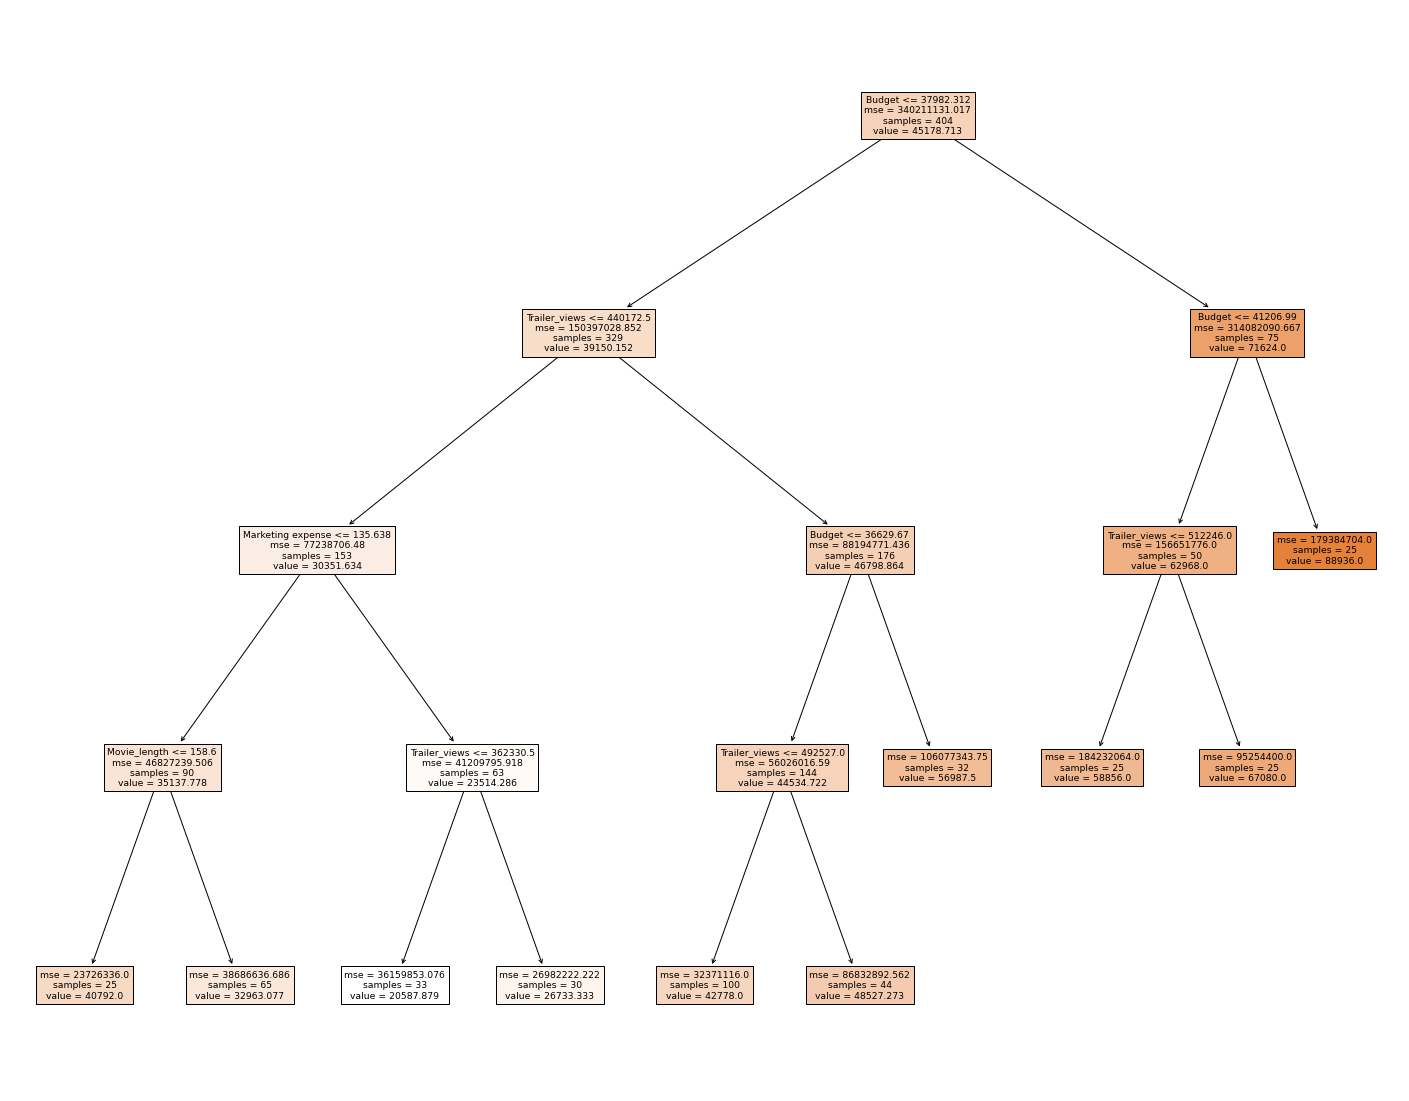

In [63]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(regtree4, 
               feature_names = X_train.columns,
               class_names= y_train.name,
               filled=True)

#### Make predictions

In [65]:
y_pred_regtree = regtree4.predict(X_test)
y_pred_regtree

array([42778.        , 42778.        , 42778.        , 26733.33333333,
       42778.        , 48527.27272727, 42778.        , 42778.        ,
       42778.        , 42778.        , 26733.33333333, 20587.87878788,
       26733.33333333, 20587.87878788, 88936.        , 67080.        ,
       42778.        , 67080.        , 48527.27272727, 42778.        ,
       48527.27272727, 42778.        , 42778.        , 48527.27272727,
       42778.        , 42778.        , 42778.        , 32963.07692308,
       88936.        , 32963.07692308, 26733.33333333, 26733.33333333,
       42778.        , 42778.        , 42778.        , 32963.07692308,
       20587.87878788, 42778.        , 26733.33333333, 20587.87878788,
       42778.        , 42778.        , 42778.        , 26733.33333333,
       48527.27272727, 48527.27272727, 40792.        , 32963.07692308,
       32963.07692308, 56987.5       , 40792.        , 40792.        ,
       42778.        , 88936.        , 32963.07692308, 40792.        ,
      

In [68]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred_regtree), np.sqrt(mean_squared_error(y_test, y_pred_regtree)))

0.6370835812206892 10808.872969222446
